Notebook for Gradient Boosted algorithm training and hyperparameter tuning

In [1]:
import numpy as np
import pandas as pd
import os
import sys

import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Path
try:
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
pipeline_path = os.path.join(parent_dir, 'Pipeline')
sys.path.append(pipeline_path)

from build_a_pipeline import build_pipeline_P0_foward_price


In [2]:

x_train, x_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(drop_features=True, 
                                                                                remove_outliers = True, 
                                                                                percentage_of_outliers=0.01, 
                                                                                deal_with_skewness = False)

In [3]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np
# Create XGBoost model
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,
    max_depth=30,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1,
    reg_lambda=1
)
model.fit(x_train, y_train)
# Predictions and evaluation
y_pred = model.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
# Predictions on validation data
y_pred = model.predict(x_val)
from sklearn.metrics import r2_score
# R-squared score
r2 = r2_score(y_val, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Mean Squared Error: 27.83834992490845
Root Mean Squared Error: 5.276206016154832
Mean Squared Error: 27.83834992490845
Root Mean Squared Error: 5.276206016154832
R-squared: 0.5034789406908631


# Model 1

# P0

In [4]:
X_train, X_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(target_column="P0")


In [5]:
gbm = GradientBoostingRegressor(random_state=42)
gbm.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [6]:
 
gbm = GradientBoostingRegressor(random_state=42)

# Define the parameter grid for tuning
param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
}

# Step 3: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=gbm,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Step 4: Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate on validation data
y_val_pred = best_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print(f"Best Parameters: {best_params}")
print(f"Validation RMSE: {rmse}")
print(f"Validation R²: {r2}")

# Document results
results = pd.DataFrame({
    "Model Parameter": [f"n_estimators: {best_params['n_estimators']}, learning_rate: {best_params['learning_rate']}, max_depth: {best_params['max_depth']}"],
    "Pipeline Parameters": ["Default settings"],
    "RMSE": [rmse],
    "R²": [r2],
    "Target": ["P0"]
})

results

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Validation RMSE: 11.729837747247549
Validation R²: -1.1272141061806429


,Model Parameter,Pipeline Parameters,RMSE,R²,Target
0,"n_estimators: 300, learning_rate: 0.1, max_dep...",Default settings,11.729838,-1.127214,P0


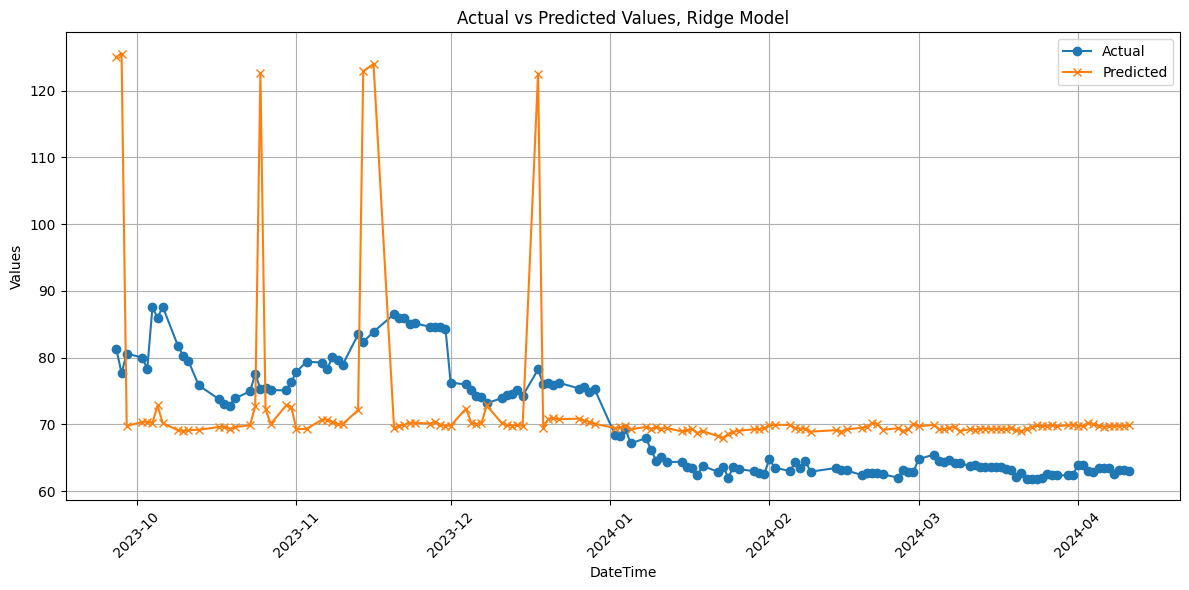

In [7]:

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(X_val.index, y_val, label='Actual', marker='o')
plt.plot(X_val.index, y_val_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values, Ridge Model')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# P1

In [8]:
X_train, X_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(target_column="P1")


In [9]:
gbm = GradientBoostingRegressor(random_state=42)

# Define the parameter grid for tuning
param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
}

# Step 3: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=gbm,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Step 4: Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate on validation data
y_val_pred = best_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print(f"Best Parameters: {best_params}")
print(f"Validation RMSE: {rmse}")
print(f"Validation R²: {r2}")

# Document results
results = pd.DataFrame({
    "Model Parameter": [f"n_estimators: {best_params['n_estimators']}, learning_rate: {best_params['learning_rate']}, max_depth: {best_params['max_depth']}"],
    "Pipeline Parameters": ["Default settings"],
    "RMSE": [rmse],
    "R²": [r2],
    "Target": ["P0"]
})

results

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Validation RMSE: 6.909823706693
Validation R²: -0.05318825760592216


,Model Parameter,Pipeline Parameters,RMSE,R²,Target
0,"n_estimators: 100, learning_rate: 0.1, max_dep...",Default settings,6.909824,-0.053188,P0


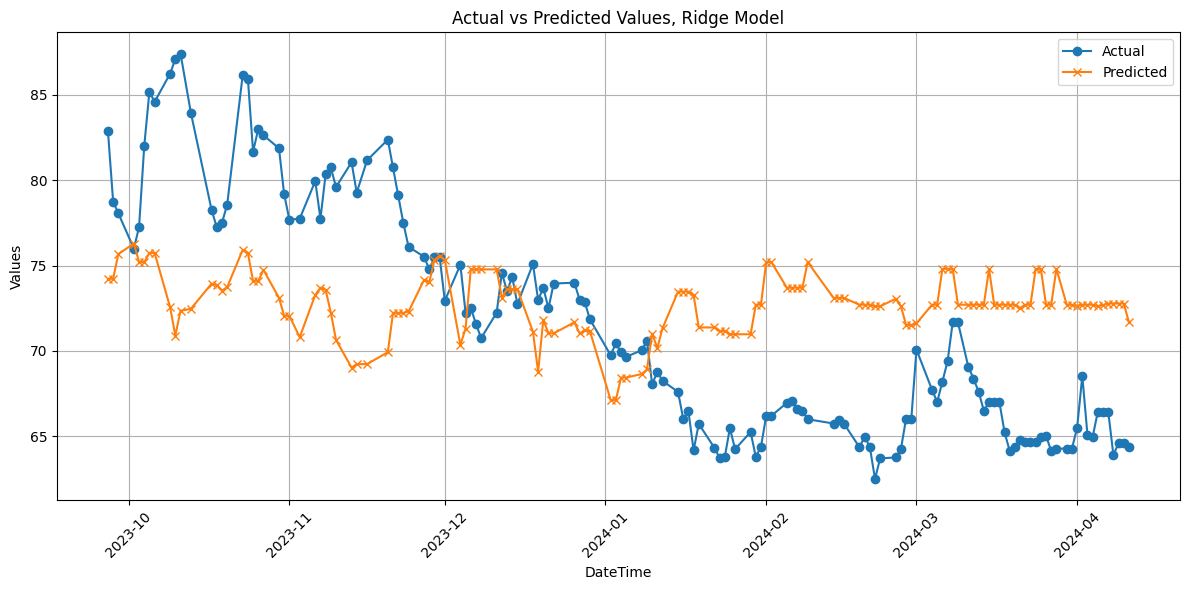

In [10]:

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(X_val.index, y_val, label='Actual', marker='o')
plt.plot(X_val.index, y_val_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values, Ridge Model')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# XGBoost

# Model 2

P0

In [11]:
X_train, X_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(target_column="P0", remove_outliers=True)


In [12]:
import xgboost as xgb


model_performance = []
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,
    max_depth=7,
    learning_rate=0.01,
    
)
model.fit(X_train, y_train)
# Predictions and evaluation
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
# Predictions on validation data
y_pred = model.predict(X_val)
from sklearn.metrics import r2_score
# R-squared score
r2 = r2_score(y_val, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')
model_performance.append({
    'Model': model,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'R-squared': r2,
})

results

Mean Squared Error: 53.501048279556066
Root Mean Squared Error: 7.31444107772809
Mean Squared Error: 53.501048279556066
Root Mean Squared Error: 7.31444107772809
R-squared: 0.04576250971880047


,Model Parameter,Pipeline Parameters,RMSE,R²,Target
0,"n_estimators: 100, learning_rate: 0.1, max_dep...",Default settings,6.909824,-0.053188,P0


P1

In [13]:
X_train, X_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(target_column="P1")


In [14]:
import xgboost as xgb


model_performance = []
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    max_depth=5,
    learning_rate=0.01,
    colsample_bytree = 0.8
)
model.fit(X_train, y_train)
# Predictions and evaluation
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
# Predictions on validation data
y_pred = model.predict(X_val)
from sklearn.metrics import r2_score
# R-squared score
r2 = r2_score(y_val, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')
model_performance.append({
    'Model': model,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'R-squared': r2,
})

results

Mean Squared Error: 43.74401906648799
Root Mean Squared Error: 6.613926146131963
Mean Squared Error: 43.74401906648799
Root Mean Squared Error: 6.613926146131963
R-squared: 0.035081226397322585


,Model Parameter,Pipeline Parameters,RMSE,R²,Target
0,"n_estimators: 100, learning_rate: 0.1, max_dep...",Default settings,6.909824,-0.053188,P0


# Model 3

# P0

In [15]:
x_train, x_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(drop_features=True, 
                                                                                remove_outliers = True, 
                                                                                percentage_of_outliers=0.01, 
                                                                                deal_with_skewness = False)


In [16]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np
# Create XGBoost model

model_performance = []
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=700,
    max_depth=50,
    learning_rate=0.01,
    subsample=1,
    colsample_bytree=1,
    reg_alpha=0.1,
    reg_lambda=1
)
model.fit(x_train, y_train)
# Predictions and evaluation
y_pred = model.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
# Predictions on validation data
y_pred = model.predict(x_val)
from sklearn.metrics import r2_score
# R-squared score
r2 = r2_score(y_val, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')
model_performance.append({
    'Model': model,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'R-squared': r2,
})


Mean Squared Error: 29.98399134153089
Root Mean Squared Error: 5.475763996149842
Mean Squared Error: 29.98399134153089
Root Mean Squared Error: 5.475763996149842
R-squared: 0.46520956941157965


# P1

In [17]:
x_train, x_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(target_column="P1", drop_features=True, 
                                                                                remove_outliers = True, 
                                                                                percentage_of_outliers=0.01, 
                                                                                deal_with_skewness = False)


In [18]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np
# Create XGBoost model

model_performance = []
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=700,
    max_depth=50,
    learning_rate=0.01,
    subsample=1,
    colsample_bytree=1,
    reg_alpha=0.1,
    reg_lambda=1
)
model.fit(x_train, y_train)
# Predictions and evaluation
y_pred = model.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
# Predictions on validation data
y_pred = model.predict(x_val)
from sklearn.metrics import r2_score
# R-squared score
r2 = r2_score(y_val, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')
model_performance.append({
    'Model': model,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'R-squared': r2,
})


Mean Squared Error: 22.915288726088566
Root Mean Squared Error: 4.786991615418661
Mean Squared Error: 22.915288726088566
Root Mean Squared Error: 4.786991615418661
R-squared: 0.4862397251491275


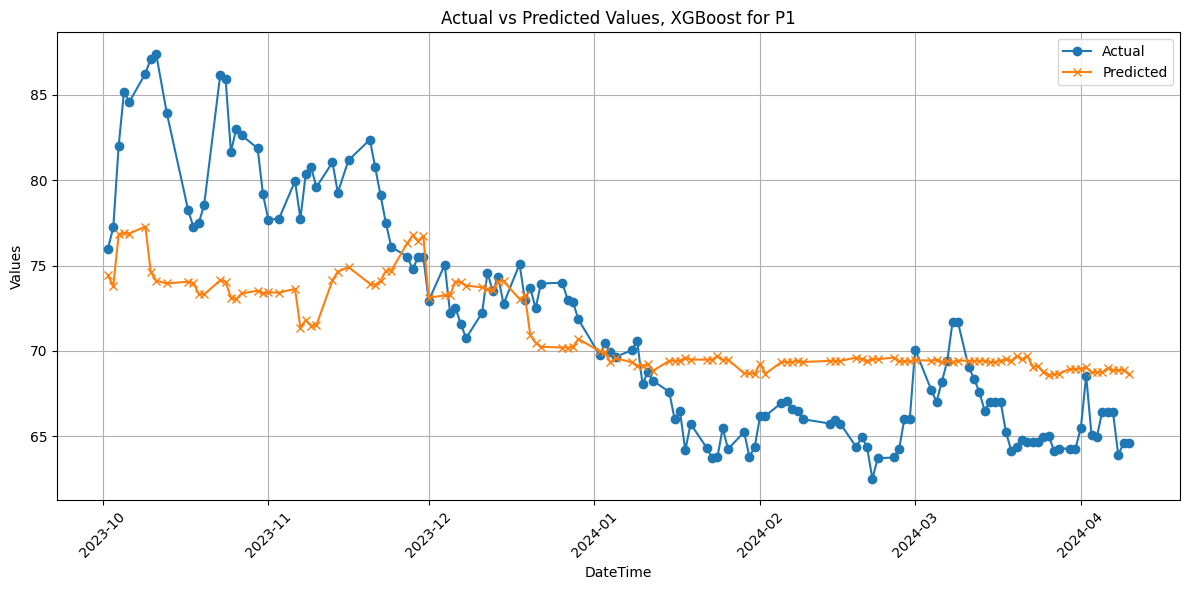

In [19]:

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(x_val.index, y_val, label='Actual', marker='o')
plt.plot(x_val.index, y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values, XGBoost for P1')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

##  TEST SET P0

In [20]:
x_train, x_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(target_column="P0", drop_features=True, 
                                                                                remove_outliers = True, 
                                                                                percentage_of_outliers=0.01, 
                                                                                deal_with_skewness = False, 
                                                                                train_size = 0.75, 
                                                                                val_size = 0.15,
                                                                                )
# Merging the train and validation sets
X_combined = pd.concat([x_train, x_val], axis=0)
y_combined = pd.concat([y_train, y_val], axis=0)


Mean Squared Error: 6950.98879720981
Root Mean Squared Error: 83.37259020331449
Mean Squared Error: 6950.98879720981
Root Mean Squared Error: 83.37259020331449
R-squared: 0.584033179495824


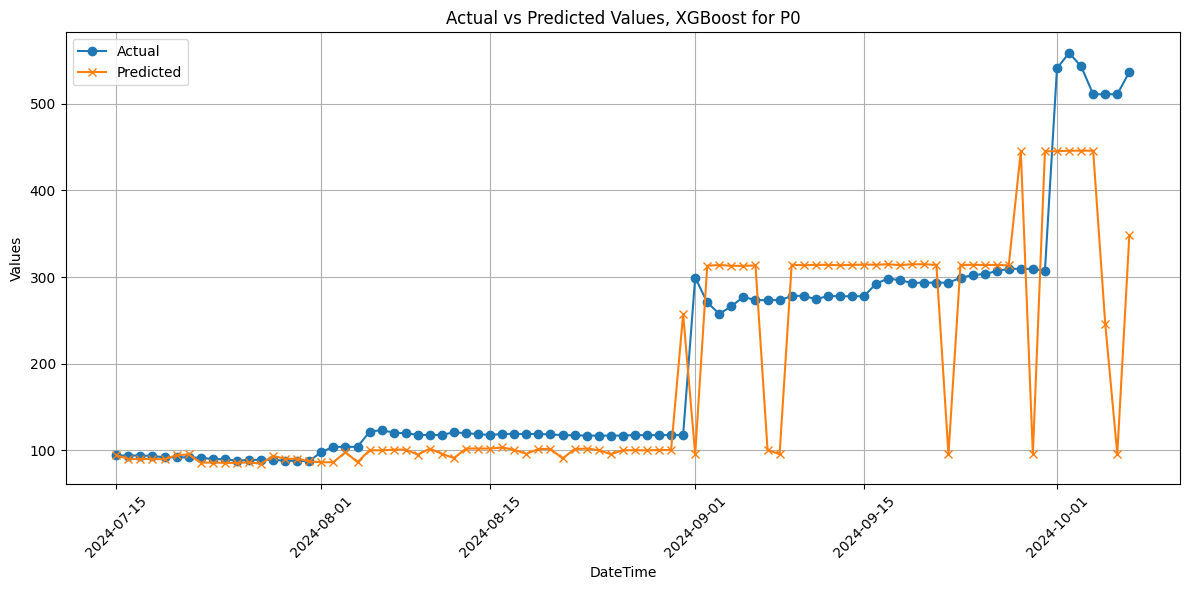

In [21]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np
# Create XGBoost model
model_performance = []
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=700,
    max_depth=50,
    learning_rate=0.01,
    subsample=1,
    colsample_bytree=1,
    reg_alpha=0.1,
    reg_lambda=1
)
model.fit(X_combined, y_combined)
# Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
# Predictions on validation data
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
# R-squared score
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')
model_performance.append({
    'Model': model,
    'Mean Squared Error': mse,
    'Dataset': 'Test',
    'Root Mean Squared Error': rmse,
    'R-squared': r2,
})

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(X_test.index, y_test, label='Actual', marker='o')
plt.plot(X_test.index, y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values, XGBoost for P0')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## TEST SET - P1

In [22]:
x_train, x_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(target_column="P1", drop_features=True, 
                                                                                remove_outliers = True, 
                                                                                percentage_of_outliers=0.01, 
                                                                                deal_with_skewness = False, 
                                                                                train_size = 0.75, 
                                                                                val_size = 0.15,
                                                                                )
# Merging the train and validation sets
X_combined = pd.concat([x_train, x_val], axis=0)
y_combined = pd.concat([y_train, y_val], axis=0)


Mean Squared Error: 25380.16478138258
Root Mean Squared Error: 159.31153373620688
Mean Squared Error: 25380.16478138258
Root Mean Squared Error: 159.31153373620688
R-squared: -0.4697733057894977


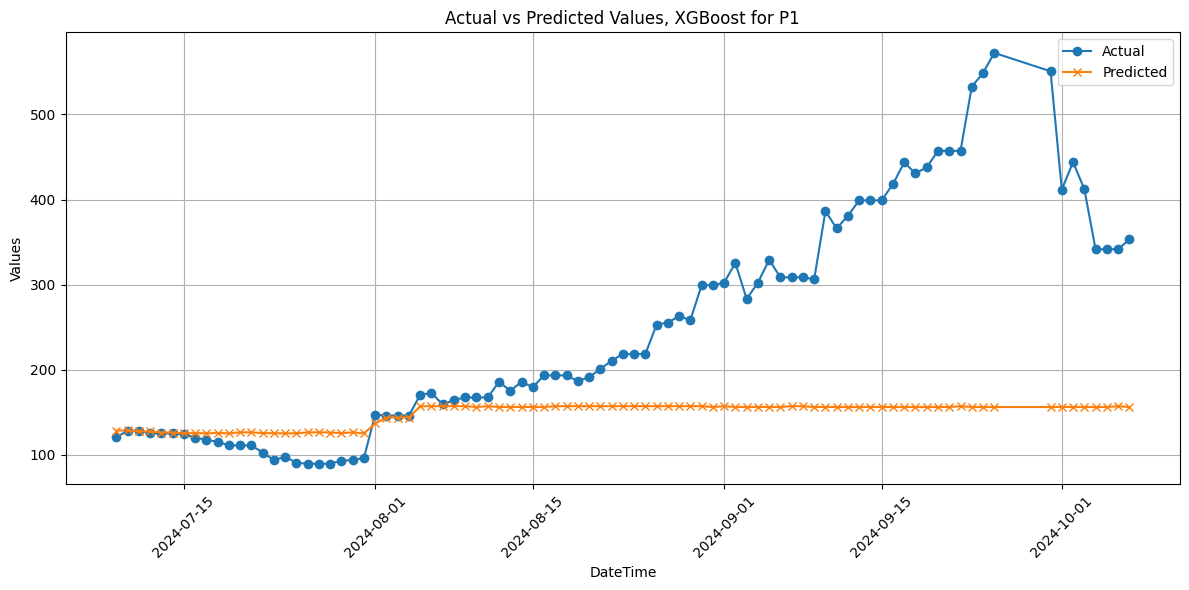

In [23]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np
# Create XGBoost model
model_performance = []
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=700,
    max_depth=50,
    learning_rate=0.01,
    subsample=1,
    colsample_bytree=1,
    reg_alpha=0.1,
    reg_lambda=1
)
model.fit(X_combined, y_combined)
# Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
# Predictions on validation data
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
# R-squared score
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')
model_performance.append({
    'Model': model,
    'Mean Squared Error': mse,
    'Dataset': 'Test',
    'Root Mean Squared Error': rmse,
    'R-squared': r2,
})

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(X_test.index, y_test, label='Actual', marker='o')
plt.plot(X_test.index, y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values, XGBoost for P1')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
